In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn import svm
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data_new.csv')

In [7]:

df.columns

Index(['交易日期', '到期月份(週別)', '開盤價', '最高價', '最低價', '收盤價', '漲跌價', '漲跌%', '成交量',
       '隔日漲跌價', '隔日收盤', '隔日漲跌', 'slowk', 'slowd', 'K-D', 'upperband',
       'middleband', 'lowerband', 'band_width', 'BIAS20', 'BIAS60', 'BIAS5',
       'OBV', 'macd', 'macdsignal', 'macdhist', 'RSI'],
      dtype='object')

In [4]:
df

,交易日期,到期月份(週別),開盤價,最高價,最低價,收盤價,漲跌價,漲跌%,成交量,隔日漲跌價,...,lowerband,band_width,BIAS20,BIAS60,BIAS5,OBV,macd,macdsignal,macdhist,RSI
0,2013-04-08,2013-04-01,7859,7870,7733,7739,-197,-0.0248,128621,-30.0,...,7717.375865,335.948270,-0.018560,-0.013948,-0.018417,-471573.0,-7.573789,-2.430880,-5.142909,39.234608
1,2013-04-09,2013-04-01,7717,7750,7697,7709,-28,-0.0036,84475,19.0,...,7695.664314,349.471372,-0.020507,-0.017639,-0.016885,-556048.0,-19.422695,-5.829243,-13.593451,37.446043
2,2013-04-10,2013-04-01,7737,7745,7713,7728,20,0.0026,59229,90.0,...,7688.404068,332.491865,-0.016124,-0.015019,-0.009612,-496819.0,-26.969014,-10.057197,-16.911817,39.332339
3,2013-04-11,2013-04-01,7776,7825,7759,7818,92,0.0119,84730,-34.0,...,7692.592288,306.015424,-0.003518,-0.003641,0.004162,-412089.0,-25.394546,-13.124667,-12.269879,47.420424
4,2013-04-12,2013-04-01,7822,7832,7783,7784,-32,-0.0041,64379,-21.0,...,7695.387027,279.825946,-0.006547,-0.008062,0.003662,-476468.0,-26.583843,-15.816502,-10.767341,44.980726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,2022-12-28,2023-01-01,14190,14195,14070,14110,-195,-0.0136,84583,129.0,...,14018.654978,636.790044,-0.015837,-0.030197,-0.007959,1277773.0,-97.257386,-88.181003,-9.076383,39.731027
3768,2022-12-28,2023-01-01,14310,14320,14214,14239,-66,-0.0046,34947,-207.0,...,14022.071726,593.856548,-0.005587,-0.020814,0.001195,1312720.0,-91.901233,-88.925049,-2.976183,45.434656
3769,2022-12-29,2023-01-01,13960,14072,13938,14032,-80,-0.0057,78436,-45.0,...,14020.991295,528.417411,-0.017725,-0.034516,-0.010856,1234284.0,-103.170329,-91.774105,-11.396224,39.048656
3770,2022-12-29,2023-01-01,14127,14168,13976,13987,-125,-0.0089,49467,147.0,...,14005.257042,496.985915,-0.018714,-0.037122,-0.009616,1184817.0,-114.413406,-96.301965,-18.111441,37.804675


In [73]:
tSNE = PCA(n_components=12, random_state=0)
train = df[df['交易日期'] < '2020-08-01']
test = df[df['交易日期'] >= '2020-08-01']
X_train = pd.DataFrame(tSNE.fit_transform(train[['開盤價', '最高價', '最低價', '收盤價', '漲跌價', '漲跌%', '成交量',
       'slowk', 'slowd', 'K-D', 'upperband', 'middleband', 'lowerband',
       'band_width', 'BIAS20', 'BIAS60', 'BIAS5', 'OBV', 'macd', 'macdsignal',
       'macdhist', 'RSI']]))
X_test = pd.DataFrame(tSNE.fit_transform(test[['開盤價', '最高價', '最低價', '收盤價', '漲跌價', '漲跌%', '成交量',
       'slowk', 'slowd', 'K-D', 'upperband', 'middleband', 'lowerband',
       'band_width', 'BIAS20', 'BIAS60', 'BIAS5', 'OBV', 'macd', 'macdsignal',
       'macdhist', 'RSI']]))
model_tsne = HistGradientBoostingClassifier(random_state=0)
model_tsne.fit(X_train, train['隔日漲跌'])
print(model_tsne.score(X_test, test['隔日漲跌']))
roc_auc_score(y_true=test['隔日漲跌'], y_score=model_tsne.predict(X_test))

0.5625524769101595


0.5618650043719854

In [8]:
scalar = MinMaxScaler()
def preprocessing(df):
    cluster = KMeans(n_clusters = 4)
    df['漲跌category'] = cluster.fit_predict(df[['漲跌%']])
    df['最高價_to_upper'] = df['最高價'] - df['upperband']
    df['最低價_to_lower'] = df['lowerband'] - df['最低價'] 
    df['close_to_upper'] = df['收盤價'] - df['upperband']
    df['close_to_lower'] = df['lowerband'] - df['收盤價']
    
    X = df[['開盤價', '最高價', '最低價', '收盤價', '漲跌價', '漲跌%', '成交量',
       'slowk', 'slowd', 'K-D', 'upperband', 'middleband', 'lowerband',
       'band_width', 'BIAS20', 'BIAS60', 'BIAS5', 'OBV', 'macd', 'macdsignal',
       'macdhist', 'RSI', '最高價_to_upper', '最低價_to_lower', 'close_to_upper', 'close_to_lower', '漲跌category']]
    y = df['隔日漲跌']
    return X, y

train = df[df['交易日期'] < '2020-08-01']
test = df[df['交易日期'] >= '2020-08-01']

X_train, y_train = preprocessing(train)
X_test, y_test = preprocessing(test)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

X_train = pd.concat([pd.DataFrame(X_train['漲跌category']), pd.DataFrame(scalar.fit_transform(X_train[['開盤價', '最高價', '最低價', '收盤價', '漲跌價', '漲跌%', '成交量',
       'slowk', 'slowd', 'K-D', 'upperband', 'middleband', 'lowerband',
       'band_width', 'BIAS20', 'BIAS60', 'BIAS5', 'OBV', 'macd', 'macdsignal',
       'macdhist', 'RSI', '最高價_to_upper', '最低價_to_lower', 'close_to_upper', 'close_to_lower']]))], axis = 1)
print(scalar.transform(X_test[['開盤價', '最高價', '最低價', '收盤價', '漲跌價', '漲跌%', '成交量',
       'slowk', 'slowd', 'K-D', 'upperband', 'middleband', 'lowerband',
       'band_width', 'BIAS20', 'BIAS60', 'BIAS5', 'OBV', 'macd', 'macdsignal',
       'macdhist', 'RSI', '最高價_to_upper', '最低價_to_lower', 'close_to_upper', 'close_to_lower']]).shape)


X_test = pd.concat([X_test['漲跌category'].reset_index(drop = True), pd.DataFrame(scalar.transform(X_test[['開盤價', '最高價', '最低價', '收盤價', '漲跌價', '漲跌%', '成交量',
       'slowk', 'slowd', 'K-D', 'upperband', 'middleband', 'lowerband',
       'band_width', 'BIAS20', 'BIAS60', 'BIAS5', 'OBV', 'macd', 'macdsignal',
       'macdhist', 'RSI', '最高價_to_upper', '最低價_to_lower', 'close_to_upper', 'close_to_lower']])).reset_index(drop = True)], axis = 1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

C:\Users\Swifte\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Swifte\AppData\Local\Temp\ipykernel_33484\1845893550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['漲跌category'] = cluster.fit_predict(df[['漲跌%']])
C:\Users\Swifte\AppData\Local\Temp\ipykernel_33484\1845893550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

(2581, 27) (1191, 27)
(2581,) (1191,)
(1191, 26)
(2581, 27) (1191, 27)
(2581,) (1191,)


In [13]:
X_test.columns

Index(['漲跌category',            0,            1,            2,            3,
                  4,            5,            6,            7,            8,
                  9,           10,           11,           12,           13,
                 14,           15,           16,           17,           18,
                 19,           20,           21,           22,           23,
                 24,           25],
      dtype='object')

In [14]:
X_train.columns

Index(['漲跌category',            0,            1,            2,            3,
                  4,            5,            6,            7,            8,
                  9,           10,           11,           12,           13,
                 14,           15,           16,           17,           18,
                 19,           20,           21,           22,           23,
                 24,           25],
      dtype='object')

In [9]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

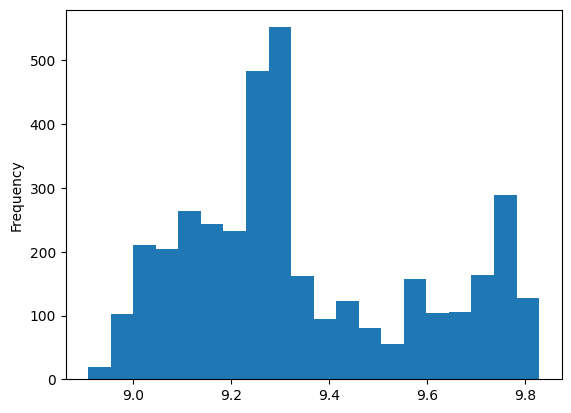

In [9]:
df['開盤價_sqrt'].plot(kind='hist', bins=20)
scalar = MinMaxScaler()
df['開盤價_sqrt_normalize'] = scalar.fit_transform(df['開盤價_sqrt'].values.reshape(-1, 1))

<AxesSubplot: ylabel='Frequency'>

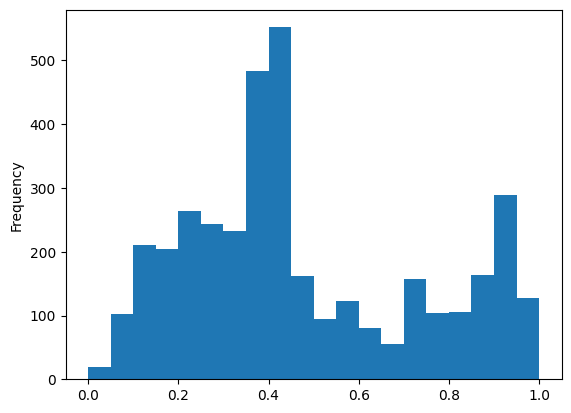

In [10]:
df['開盤價_sqrt_normalize'].plot(kind='hist', bins=20)

In [85]:
df.columns

Index(['交易日期', '到期月份(週別)', '開盤價', '最高價', '最低價', '收盤價', '漲跌價', '漲跌%', '成交量',
       '隔日漲跌價', '隔日漲跌', 'slowk', 'slowd', 'K-D', 'upperband', 'middleband',
       'lowerband', 'band_width', 'BIAS20', 'BIAS60', 'BIAS5', 'OBV', 'macd',
       'macdsignal', 'macdhist', 'RSI'],
      dtype='object')

In [41]:
X_train.rename({'漲跌category': int(26)}, inplace=True)
X_test.rename({'漲跌category': int(26)}, inplace=True)

In [165]:
features = []

In [60]:
model_RFC = RandomForestClassifier(random_state=0, max_depth=12, n_estimators=100, min_samples_split=2, min_samples_leaf=4)

In [61]:

model_RFC.fit(X_train, y_train)


RandomForestClassifier(max_depth=12, min_samples_leaf=4, random_state=0)

In [62]:
model_RFC.score(X_test, y_test)

0.635600335852225

In [63]:
f_i = list(zip(features, model_RFC.feature_importances_))
f_i.sort(key=lambda x: x[1])
f_i

NameError: name 'features' is not defined

In [69]:
sig_features = ['4', '16', '6', '5', '9', '24', '17', '7', '8', '23']

In [65]:
model_original = HistGradientBoostingClassifier(max_iter=1000, learning_rate=0.01, max_depth=10, random_state=0)
model_original.fit(X_train, y_train)
print(model_original.score(X_test, y_test))
roc_auc_score(y_score=model_original.predict(X_test), y_true=y_test)


0.654911838790932


0.6557752517417426

In [68]:
X_train.columns

Index(['漲跌category', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25'],
      dtype='object')

In [72]:
model_sig_feat = HistGradientBoostingClassifier(max_iter=1000, learning_rate=0.002, max_depth=10, min_samples_leaf=6, l2_regularization=0.1, random_state=0)
model_sig_feat.fit(X_train[sig_features], y_train)
print(model_sig_feat.score(X_test[sig_features], y_test))
print(model_sig_feat.score(X_train[sig_features], y_train))
roc_auc_score(y_score=model_sig_feat.predict(X_test[sig_features]), y_true=y_test)

0.6448362720403022
0.7989151491669896


0.6447592587369192

In [175]:
X_train

,漲跌category,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,3,0.063067,0.037152,0.094745,0.054374,0.421409,0.340982,0.311741,0.569594,0.768869,...,0.459157,0.023384,0.729961,0.726012,0.469801,0.405019,0.834238,0.599092,0.871920,0.770507
1,0,0.043556,0.020265,0.090028,0.050286,0.535908,0.476099,0.203468,0.311604,0.576767,...,0.469660,0.006058,0.716779,0.721775,0.444674,0.378184,0.802944,0.605430,0.866275,0.774607
2,1,0.046304,0.019561,0.092124,0.052875,0.568428,0.515615,0.141550,0.042150,0.296222,...,0.519527,0.018206,0.708384,0.716504,0.434807,0.406485,0.808329,0.595112,0.877466,0.761617
3,2,0.051663,0.030819,0.098152,0.065140,0.617209,0.574888,0.204093,0.196330,0.168735,...,0.613961,0.035584,0.710135,0.712679,0.448610,0.527836,0.836957,0.576565,0.906530,0.719167
4,0,0.057983,0.031804,0.101297,0.060507,0.533198,0.472913,0.154180,0.297748,0.164002,...,0.610535,0.022380,0.708812,0.709323,0.453077,0.491232,0.845464,0.567159,0.903785,0.737369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,1,0.966749,0.966648,0.968680,0.965249,0.546070,0.493308,0.055858,0.854044,0.854154,...,0.604305,0.714896,0.822254,0.801967,0.535344,0.678280,0.888039,0.437418,0.942122,0.582788
2789,2,0.968810,0.990290,0.973660,0.994549,0.676829,0.578075,0.236289,0.966075,0.905429,...,0.674151,0.734966,0.845415,0.811372,0.574819,0.767574,0.914578,0.402074,0.978830,0.455813
2790,1,0.970184,0.968477,0.974053,0.970564,0.557588,0.500956,0.046278,0.849678,0.892718,...,0.588274,0.730785,0.846722,0.819190,0.559669,0.663164,0.864206,0.401198,0.926811,0.543385
2791,1,1.000000,1.000000,0.995151,1.000000,0.583333,0.517527,0.233412,0.862856,0.895728,...,0.654313,0.750615,0.865681,0.829694,0.585293,0.745966,0.907146,0.320298,0.964451,0.425957


In [10]:
model = HistGradientBoostingClassifier(random_state=42, max_depth=8, learning_rate=0.002, max_iter=1000, min_samples_leaf=4, l2_regularization=0.1, categorical_features=['漲跌category'])

In [137]:
param_grid = {
    'learning_rate': [0.001, 0.002, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900],
    'min_samples_leaf': [6, 8, 10, 12, 14, 16, 18, 20],
    'l2_regularization': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

In [11]:
model.fit(X_train, y_train)

HistGradientBoostingClassifier(categorical_features=['漲跌category'],
                               l2_regularization=0.1, learning_rate=0.002,
                               max_depth=8, max_iter=1000, min_samples_leaf=4,
                               random_state=42)

In [178]:
model.score(X_test, y_test)

0.6700715015321757

In [179]:
print(f1_score(model.predict(X_test), y_test))
print(precision_score(model.predict(X_test), y_test))
print(recall_score(model.predict(X_test), y_test)) 
roc_auc_score(model.predict(X_test), y_test)

0.6909090909090908
0.7248995983935743
0.659963436928702


0.6714169036495362

In [159]:
model.score(X_train, y_train)

0.8403150733977801

In [12]:
model2 = HistGradientBoostingClassifier(random_state=42, max_depth=8, learning_rate=0.002, max_iter=1000, min_samples_leaf=4, l2_regularization=0.1, categorical_features=['漲跌category'])
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.6750629722921915

In [31]:
X_test

,漲跌category,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,0.944240,0.937099,0.978241,0.934102,0.464770,0.431485,0.327126,0.464438,0.569234,...,0.515939,0.630782,0.919625,0.947583,0.473187,0.613555,0.829922,0.433227,0.869740,0.569704
1,0,0.953809,0.943332,0.987307,0.953688,0.537263,0.485660,0.135614,0.422309,0.498152,...,0.579315,0.642434,0.914725,0.945414,0.465490,0.656637,0.840203,0.434927,0.898401,0.543403
2,3,0.941480,0.949377,0.993472,0.968149,0.682927,0.595921,0.268952,0.528972,0.464391,...,0.624302,0.665235,0.916497,0.944082,0.473055,0.687299,0.842504,0.424380,0.912695,0.509381
3,1,0.924733,0.925576,0.972076,0.943072,0.590108,0.525813,0.114519,0.632700,0.521860,...,0.558748,0.655348,0.903549,0.940071,0.448828,0.617774,0.810987,0.499741,0.880701,0.602821
4,1,0.975340,0.970910,1.021396,0.989200,0.632791,0.557043,0.256508,0.813277,0.655394,...,0.679453,0.677109,0.915101,0.939491,0.479845,0.713208,0.867104,0.379886,0.935703,0.479053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2,1.249540,1.244617,1.280145,1.239246,0.422764,0.412365,0.203733,0.422830,0.444397,...,0.530859,0.382166,0.655063,0.653265,0.458105,0.412467,0.756677,0.583247,0.812099,0.736017
1187,0,1.271623,1.268228,1.306256,1.262859,0.510163,0.469726,0.081995,0.363165,0.415449,...,0.593624,0.389333,0.661256,0.652286,0.476244,0.498042,0.802722,0.520887,0.855716,0.673893
1188,0,1.207214,1.221383,1.256210,1.224968,0.500678,0.462715,0.188657,0.261009,0.338457,...,0.510997,0.373247,0.648225,0.648538,0.451207,0.402229,0.751929,0.642836,0.819356,0.775758
1189,0,1.237946,1.239516,1.263101,1.216731,0.470190,0.442320,0.117607,0.255952,0.281460,...,0.519500,0.363101,0.635223,0.642581,0.431240,0.383564,0.791999,0.619001,0.819916,0.790236


In [32]:
model2.predict_proba(X_test).shape

(1191, 2)

In [35]:
print(f1_score(y_test, model2.predict(X_test)))
print(precision_score(y_test, model2.predict(X_test)))
print(recall_score(y_test, model2.predict(X_test)) ) 
roc_auc_score(y_test, y_score = model2.predict_proba(X_test)[:, 1])


0.6772310258548792
0.6835016835016835
0.6710743801652893


0.7369573801934957

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
 
cm = confusion_matrix(y_test, model2.predict(X_test))
cm

array([[398, 188],
       [199, 406]], dtype=int64)

In [23]:
model2.classes_

array([0, 1], dtype=int64)

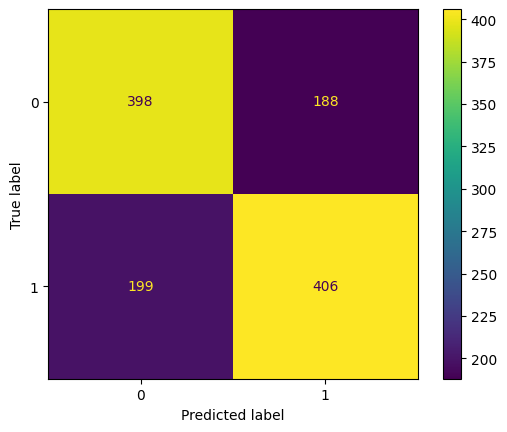

In [24]:
ConfusionMatrixDisplay(cm).plot()


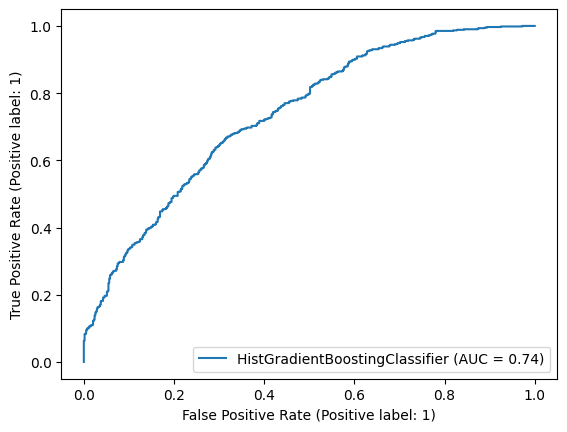

In [27]:
RocCurveDisplay.from_estimator(model2, X_test, y_test)

In [14]:
model2.score(X_train, y_train)

0.8547074777218132

In [87]:
backtest_df = pd.read_csv('data_new.csv')
backtest_df = backtest_df[2580:]
backtest_df

,交易日期,到期月份(週別),開盤價,最高價,最低價,收盤價,漲跌價,漲跌%,成交量,隔日漲跌價,...,lowerband,band_width,BIAS20,BIAS60,BIAS5,OBV,macd,macdsignal,macdhist,RSI
2580,2020-07-31,2020-08-01,12576,12596,12434,12590,-5,-0.0004,67106,-147.0,...,11964.599457,810.801085,0.017785,0.049912,0.002389,2624868.0,145.913003,136.529197,9.383806,57.959313
2581,2020-08-03,2020-08-01,12531,12567,12405,12443,-133,-0.0106,134894,107.0,...,12015.455015,750.289971,0.004229,0.036142,-0.010135,2489974.0,131.523769,135.528111,-4.004342,53.133627
2582,2020-08-03,2020-08-01,12583,12600,12455,12550,-26,-0.0021,56809,79.0,...,12069.287026,692.725949,0.010821,0.043393,-0.000892,2546783.0,127.286919,133.879873,-6.592954,56.005004
2583,2020-08-04,2020-08-01,12516,12632,12489,12629,189,0.0152,111175,-137.0,...,12079.511345,706.277311,0.015793,0.048190,0.005670,2657958.0,128.818880,132.867674,-4.048794,58.048638
2584,2020-08-04,2020-08-01,12425,12506,12371,12492,52,0.0042,48208,252.0,...,12131.401076,640.997847,0.003220,0.035293,-0.003891,2609750.0,117.622339,129.818607,-12.196268,53.414813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,2022-12-28,2023-01-01,14190,14195,14070,14110,-195,-0.0136,84583,129.0,...,14018.654978,636.790044,-0.015837,-0.030197,-0.007959,1277773.0,-97.257386,-88.181003,-9.076383,39.731027
3768,2022-12-28,2023-01-01,14310,14320,14214,14239,-66,-0.0046,34947,-207.0,...,14022.071726,593.856548,-0.005587,-0.020814,0.001195,1312720.0,-91.901233,-88.925049,-2.976183,45.434656
3769,2022-12-29,2023-01-01,13960,14072,13938,14032,-80,-0.0057,78436,-45.0,...,14020.991295,528.417411,-0.017725,-0.034516,-0.010856,1234284.0,-103.170329,-91.774105,-11.396224,39.048656
3770,2022-12-29,2023-01-01,14127,14168,13976,13987,-125,-0.0089,49467,147.0,...,14005.257042,496.985915,-0.018714,-0.037122,-0.009616,1184817.0,-114.413406,-96.301965,-18.111441,37.804675


In [88]:
backtest_df = backtest_df[['開盤價', '收盤價']]
backtest_df.drop(backtest_df.tail(1).index, inplace=True)
backtest_df

C:\Users\Swifte\AppData\Local\Temp\ipykernel_33484\2969181283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_df.drop(backtest_df.tail(1).index, inplace=True)


,開盤價,收盤價
2580,12576,12590
2581,12531,12443
2582,12583,12550
2583,12516,12629
2584,12425,12492
...,...,...
3766,14249,14246
3767,14190,14110
3768,14310,14239
3769,13960,14032


In [89]:
pd.DataFrame(model2.predict_proba(X_test))

,0,1
0,0.364374,0.635626
1,0.506805,0.493195
2,0.793736,0.206264
3,0.277807,0.722193
4,0.834282,0.165718
...,...,...
1186,0.231917,0.768083
1187,0.572205,0.427795
1188,0.329360,0.670640
1189,0.445492,0.554508


In [90]:
label = pd.DataFrame(model.predict(X_test)).rename(columns={0:'label'})

In [91]:
backtest_df = pd.concat([backtest_df.reset_index(), pd.DataFrame(model2.predict_proba(X_test)), label], axis=1)
backtest_df

,index,開盤價,收盤價,0,1,label
0,2580,12576,12590,0.364374,0.635626,1
1,2581,12531,12443,0.506805,0.493195,0
2,2582,12583,12550,0.793736,0.206264,0
3,2583,12516,12629,0.277807,0.722193,1
4,2584,12425,12492,0.834282,0.165718,0
...,...,...,...,...,...,...
1186,3766,14249,14246,0.231917,0.768083,1
1187,3767,14190,14110,0.572205,0.427795,0
1188,3768,14310,14239,0.329360,0.670640,1
1189,3769,13960,14032,0.445492,0.554508,1


In [92]:
backtest_df.columns

Index(['index', '開盤價', '收盤價', 0, 1, 'label'], dtype='object')

In [93]:
backtest_df['Profit'] = (backtest_df['開盤價'] - backtest_df['收盤價']) * backtest_df[0] + (backtest_df['收盤價'] - backtest_df['開盤價']) * backtest_df[1]
# backtest_df.apply(lambda x: (x['開盤價'] - x['收盤價']) * x['0'] + (x['收盤價'] - x['開盤價']) * x['1'])

In [102]:
def func(row):
    if row['label'] == 1:
        return row['收盤價'] - row['開盤價']
    else:
        return row['開盤價'] - row['收盤價']
    

In [103]:
backtest_df['Single Side'] = backtest_df.apply(func, axis=1)
backtest_df

,index,開盤價,收盤價,0,1,label,Profit,Single Side
0,2580,12576,12590,0.364374,0.635626,1,3.797541,14.0
1,2581,12531,12443,0.506805,0.493195,0,1.197750,88.0
2,2582,12583,12550,0.793736,0.206264,0,19.386558,33.0
3,2583,12516,12629,0.277807,0.722193,1,50.215642,113.0
4,2584,12425,12492,0.834282,0.165718,0,-44.793765,-67.0
...,...,...,...,...,...,...,...,...
1186,3766,14249,14246,0.231917,0.768083,1,-1.608500,-3.0
1187,3767,14190,14110,0.572205,0.427795,0,11.552748,80.0
1188,3768,14310,14239,0.329360,0.670640,1,-24.230896,-71.0
1189,3769,13960,14032,0.445492,0.554508,1,7.849135,72.0


In [104]:
backtest_df['Single Side'].sum()

14309.0

In [105]:
backtest_df['Single Side'].mean()

12.014273719563391

In [109]:
backtest_df['Single Side'].max()

584.0

In [110]:
backtest_df['Single Side'].min()

-811.0

In [111]:
backtest_df['Single Side'].std()

116.84092021387822

In [71]:
backtest_df['Profit'].sum()

3428.84506542881

In [77]:
backtest_df['Profit'].mean()

2.8789631111912763

In [78]:
backtest_df['Profit'].max()

299.0625317102065

In [79]:
backtest_df['Profit'].min()

-221.07223608417203

In [107]:
backtest_df['Profit'].std()

43.96168432518447

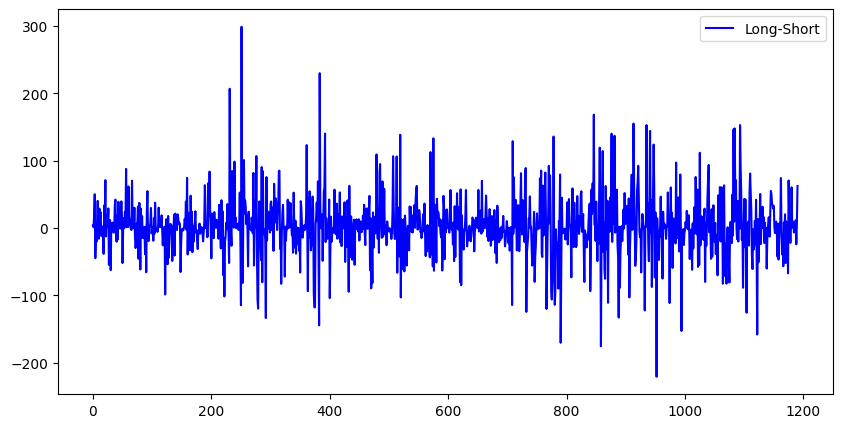

In [117]:
#Plot Profit
plt.figure(figsize=(10,5))
plt.plot(backtest_df['Profit'], label='Long-Short', color='blue')
plt.legend()
plt.show()

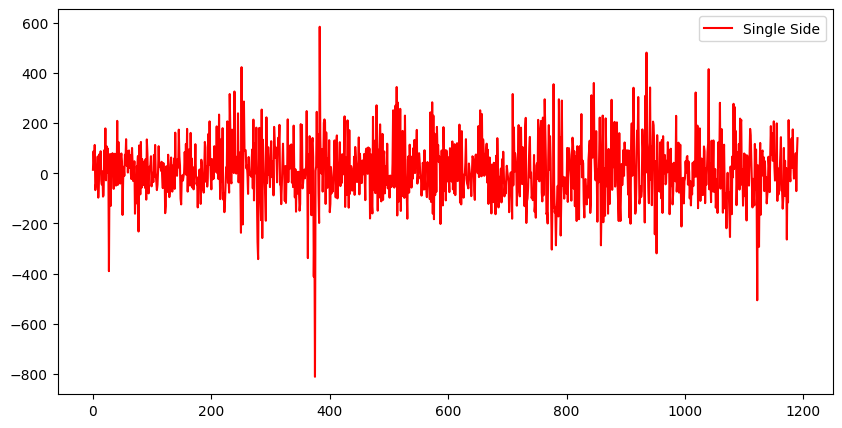

In [116]:
plt.figure(figsize=(10,5))
plt.plot(backtest_df['Single Side'], label='Single Side', color='red')
plt.legend()
plt.show()

In [72]:
backtest_df[backtest_df['Profit'] > 0].count()

index     630
開盤價       630
收盤價       630
0         630
1         630
Profit    630
dtype: int64

In [37]:
model2.predict(X_test).shape

(1191,)